## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [87]:
#import labraries
import pandas as pd
df = pd.read_csv('/content/goodreads.csv')
df

4.40 136455  0439023483  good_reads:book  \
0     4.41  16648  0439358078  good_reads:book   
1     3.56  85746  0316015849  good_reads:book   
2     4.23  47906  0061120081  good_reads:book   
3     4.23  34772  0679783261  good_reads:book   
4     4.25  12363  0446675539  good_reads:book   
...    ...    ...         ...              ...   
5994  4.17   2226  0767913736  good_reads:book   
5995  3.99    775  1416909427  good_reads:book   
5996  3.78    540  1620612321  good_reads:book   
5997  3.91    281         NaN  good_reads:book   
5998  4.35     61  0786929081  good_reads:book   

     https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0     https://www.goodreads.com/author/show/1077326....            2003.0   
1     https://www.goodreads.com/author/show/941441.S...            2005.0   
2     https://www.goodreads.com/author/show/1825.Har...            1960.0   
3     https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4     https://www.goodreads.com/author/show/11081.Ma...            1936.0   
...                                                 ...               ...   
5994  https://www.goodreads.com/author/show/44565.Ca...            2005.0   
5995  https://www.goodreads.com/author/show/151371.J...            2006.0   
5996  https://www.goodreads.com/author/show/5761314....            2012.0   
5997  https://www.goodreads.com/author/show/1201952....            2006.0   
5998  https://www.goodreads.com/author/show/1023510....            2001.0   

     /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0     /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1     /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2     /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3     /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4     /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      
...                                                 ...                                                                                                                                                                                                      
5994  /genres/history|/genres/non-fiction|/genres/bi...                                                                                                                                                                                                      
5995  /genres/young-adult|/genres/realistic-fiction|...                                                                                                                                                                                                      
5996  /genres/contemporary|/genres/romance|/genres/y...                                                                                                                                           

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [88]:
#Read the data into a dataframe
#Inser your code
df  = pd.read_csv('goodreads.csv')

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()



4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [89]:
#Read the data into a dataframe specifying column names
df = pd.read_csv("goodreads.csv", names=['rating','review_count','isbn','booktype','author_url','year','genre_url','dir','rating_count','name'])

#Examine the first couple of rows of the dataframes
####### 
#   Insert your code
####### 
df.head()


rating review_count        isbn         booktype  \
0    4.40       136455  0439023483  good_reads:book   
1    4.41        16648  0439358078  good_reads:book   
2    3.56        85746  0316015849  good_reads:book   
3    4.23        47906  0061120081  good_reads:book   
4    4.23        34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                           genre_url  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [90]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_url        object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [91]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_url        62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [92]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()#rating 2 null value

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_url        62
dir               0
rating_count      0
name              0
dtype: int64

In [93]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
#df[df.rating.isna()]#To take df we put df in ourside braket
df[df.year.isna() == True]


rating review_count        isbn         booktype  \
2442    4.23          526         NaN  good_reads:book   
2869    4.61            2         NaN  good_reads:book   
3643     NaN         None        None             None   
5282     NaN         None        None             None   
5572    3.71           35  8423336603  good_reads:book   
5658    4.32           44         NaN  good_reads:book   
5683    4.56          204         NaN  good_reads:book   

                                             author_url  year  \
2442  https://www.goodreads.com/author/show/623606.A...   NaN   
2869  https://www.goodreads.com/author/show/8182217....   NaN   
3643                                               None   NaN   
5282                                               None   NaN   
5572  https://www.goodreads.com/author/show/285658.E...   NaN   
5658  https://www.goodreads.com/author/show/25307.Ro...   NaN   
5683  https://www.goodreads.com/author/show/3097905....   NaN   

                                              genre_url  \
2442  /genres/religion|/genres/islam|/genres/non-fic...   
2869                                                NaN   
3643                                                NaN   
5282                                                NaN   
5572                                    /genres/fiction   
5658  /genres/fantasy|/genres/fantasy|/genres/epic-f...   
5683  /genres/fantasy|/genres/young-adult|/genres/ro...   

                                                    dir rating_count  \
2442                       dir25/1301625.La_Tahzan.html         4134   
2869  dir29/22031070-my-death-experiences---a-preach...           23   
3643                    dir37/9658936-harry-potter.html         None   
5282                       dir53/113138.The_Winner.html         None   
5572  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403   
5658  dir57/5533041-assassin-s-apprentice-royal-assa...         3850   
5683                  dir57/12474623-tiger-s-dream.html          895   

                                                   name  
2442                                          La Tahzan  
2869  My Death Experiences - A Preacherâs 18 Apoca...  
3643                                               None  
5282                                               None  
5572  Ãrase una vez el amor pero tuve que matarlo. ...  
5658  Assassin's Apprentice / Royal Assassin (Farsee...  
5683                 Tiger's Dream (The Tiger Saga, #5)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [94]:
df.shape

(6000, 10)

In [95]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
#df.dropna()remove everything
df.dropna(subset=['rating','year'],inplace=True) 

df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [96]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes



rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_url        object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [97]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
#df['rating_count'] = df['rating_count'].astype('int')
df['review_count'] = df['review_count'].astype('int')
df['year'] = df['year'].astype('int')
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_url        object
dir              object
rating_count     object
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [98]:
#Insert Your code here
df.isna().sum()

rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_url        59
dir               0
rating_count      0
name              0
dtype: int64

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [99]:
#Get the first author_url
author = df['author_url'][0]
author

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [100]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
name = author.split(".")[-1]
name

'Suzanne_Collins'

In [101]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
  name = url.split(".")[-1]
  return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                           genre_url  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [102]:
#Get first genre_url
df.isna().sum()

rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_url        59
dir               0
rating_count      0
name              0
author            0
dtype: int64

In [103]:
newdf = df.dropna(subset=['genre_url'])
newdf.shape

(5934, 11)

In [104]:
genre = newdf.genre_url[0]
genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [105]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
genres = genre.split("/genres/")[1:]
genres
newgenre = [genre.replace("|","") for genre in genres]
newgenre

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [106]:
genres = "|".join(newgenre)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [107]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
  genres =  url.split("/genres/")[1:]
  newgenre = [genre.replace("|","") for genre in genres]
  genres = "|".join(newgenre)
  return genres
newdf['genres'] = newdf.genre_url.map(get_genre)
newdf.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                           genre_url  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

# 4. EDA

EDA is an approach to analyzing datasets to summarize their main charateristics often with visual methods. 
Exploring data analysis 

4.1 Univeriate (One Variable)

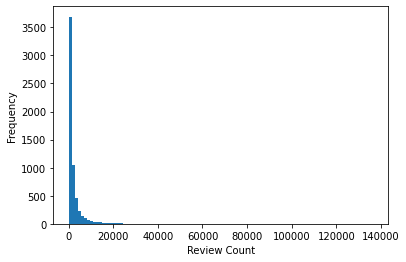

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
x  =  df.review_count
plt.hist(x,bins = 100)
plt.xlabel("Review Count")
plt.ylabel("Frequency")
plt.show()

Histogram 

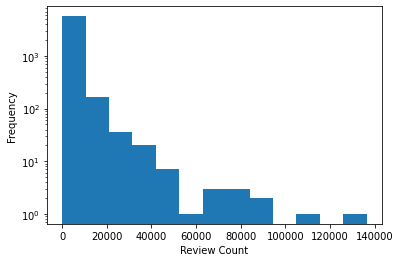

In [109]:
x = newdf.review_count
plt.hist(x,bins=13, log=True)
plt.xlabel("Review Count")
plt.ylabel("Frequency")
plt.show()

Barplot

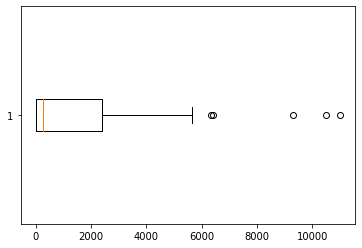

In [110]:
yeardf = df.groupby("year")
df2014 = yeardf.get_group(2014)
plt.boxplot(df2014.review_count, vert=False)
plt.show()

Multivariate (Bivariate)

In [111]:
x = df.author.unique()[:10]
y = df.author.value_counts()[:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [112]:
#Deterime best book each year based on rating. 

#each year highly rated,author
books = df.groupby('year',sort = False)

In [113]:
Inyear_2004 = books.get_group(2004)

In [114]:
best_book = Inyear_2004[Inyear_2004['review_count'] == Inyear_2004.review_count.max()]
print(best_book)

    rating  review_count        isbn         booktype  \
60    4.03         26761  0743454537  good_reads:book   

                                           author_url  year  \
60  https://www.goodreads.com/author/show/7128.Jod...  2004   

                                            genre_url  \
60  /genres/fiction|/genres/womens-fiction|/genres...   

                                    dir rating_count                name  \
60  dir01/10917.My_Sister_s_Keeper.html       646158  My Sister's Keeper   

          author  
60  Jodi_Picoult  


In [115]:
ydf = df.groupby('year',sort = True)
print(ydf)


In [116]:
ydf.size()
ydf.first()

rating  review_count        isbn         booktype  \
year                                                       
-1500    3.60          1644  0141026286  good_reads:book   
-800     3.68          5785  0143039954  good_reads:book   
-560     4.03           890  0192840509  good_reads:book   
-512     3.92          3559  1590302257  good_reads:book   
-500     4.06          1087  0140449183  good_reads:book   
...       ...           ...         ...              ...   
 2010    4.39          6212  1595142509  good_reads:book   
 2011    4.34         82098  0062024035  good_reads:book   
 2012    4.43        112279  0525478817  good_reads:book   
 2013    4.58         15195  1406321346  good_reads:book   
 2014    4.85            26  1491732954  good_reads:book   

                                              author_url  \
year                                                       
-1500  https://www.goodreads.com/author/show/5158478....   
-800     https://www.goodreads.com/author/show/903.Homer   
-560   https://www.goodreads.com/author/show/12452.Aesop   
-512   https://www.goodreads.com/author/show/1771.Sun...   
-500   https://www.goodreads.com/author/show/5158478....   
...                                                  ...   
 2010  https://www.goodreads.com/author/show/137902.R...   
 2011  https://www.goodreads.com/author/show/4039811....   
 2012  https://www.goodreads.com/author/show/1406384....   
 2013  https://www.goodreads.com/author/show/150038.C...   
 2014  https://www.goodreads.com/author/show/8189303....   

                                               genre_url  \
year                                                       
-1500  /genres/religion|/genres/literature|/genres/an...   
-800   /genres/classics|/genres/fiction|/genres/poetr...   
-560   /genres/classics|/genres/childrens|/genres/lit...   
-512   /genres/non-fiction|/genres/politics|/genres/c...   
-500   /genres/classics|/genres/spirituality|/genres/...   
...                                                  ...   
 2010  /genres/fantasy|/genres/paranormal|/genres/par...   
 2011  /genres/young-adult|/genres/science-fiction|/g...   
 2012  /genres/young-adult|/genres/book-club|/genres/...   
 2013  /genres/fantasy|/genres/young-adult|/genres/fa...   
 2014                                    /genres/fiction   

                                              dir rating_count  \
year                                                             
-1500      dir14/19351.The_Epic_of_Gilgamesh.html        42026   
-800                  dir01/1381.The_Odyssey.html       560248   
-560              dir14/21348.Aesop_s_Fables.html        71259   
-512              dir07/10534.The_Art_of_War.html       114619   
-500           dir08/99944.The_Bhagavad_Gita.html        31634   
...                                           ...          ...   
 2010             dir02/6479259-spirit-bound.html       180067   
 2011               dir01/13335037-divergent.html      1127983   
 2012  dir01/11870085-the-fault-in-our-stars.html      1150626   
 2013      dir03/18335634-clockwork-princess.html       130161   
 2014      dir10/22242097-honor-and-polygamy.html           97   

                                                name           author  
year                                                                   
-1500                          The Epic of Gilgamesh        Anonymous  
-800                                     The Odyssey            Homer  
-560                                  Aesop's Fables            Aesop  
-512                                  The Art of War          Sun_Tzu  
-500                               The Bhagavad Gita        Anonymous  
...                                              ...              ...  
 2010             Spirit Bound (Vampire Academy, #5)    Richelle_Mead  
 2011                      Divergent (Divergent, #1)    Veronica_Roth  
 2012                         The Fault in Our Stars       John_Green  
 2013  Clockw

In [117]:
ydf.groups

{-1500: [1398], -800: [47, 246], -560: [1397], -512: [674], -500: [746], -458: [1815], -442: [777], -440: [2527], -431: [1428], -429: [629], -411: [2078, 3757], -400: [1233, 1882, 3133], -390: [4475], -380: [455], -370: [4402], -360: [5367], -350: [3274], -29: [596], 4: [4717], 8: [1330], 13: [1752], 100: [2329], 121: [4843], 130: [1860], 158: [4534], 174: [1169], 200: [1622], 201: [5404], 213: [2564], 397: [1393], 632: [301], 800: [327], 900: [569], 968: [4953], 1002: [2567], 1008: [852], 1010: [5439], 1100: [1653], 1106: [5798], 1140: [5831], 1200: [4691], 1215: [3311], 1220: [4054], 1300: [2863], 1314: [363], 1321: [132, 5354], 1348: [913], 1386: [1878, 4422], 1390: [167, 3272], 1391: [5542], 1485: [1613], 1516: [1692], 1522: [2266, 3894], 1532: [384, 3753], 1572: [2177, 4637], 1589: [5705], 1590: [774], 1592: [3954], 1595: [161], 1597: [14, 1204], 1599: [495, 539, 1144], 1600: [531, 2687], 1601: [489], 1602: [3097], 1603: [245, 5361], 1604: [2384], 1605: [82, 248], 1606: [2454], 16

In [118]:
ydf.get_group(2000)

rating  review_count        isbn         booktype  \
140     3.44         43943  0143038419  good_reads:book   
201     4.23          3896  0440238609  good_reads:book   
222     4.53         15256  055357342X  good_reads:book   
310     4.16          7362  0312282990  good_reads:book   
345     3.73          8678  0439488400  good_reads:book   
...      ...           ...         ...              ...   
5857    3.95           489  2253152854  good_reads:book   
5907    4.00           171  0743439740  good_reads:book   
5923    4.11           847  0224063979  good_reads:book   
5931    3.32           309  0060882034  good_reads:book   
5971    4.24            72  0413748308  good_reads:book   

                                             author_url  year  \
140   https://www.goodreads.com/author/show/11679.El...  2000   
201   https://www.goodreads.com/author/show/3618.Phi...  2000   
222   https://www.goodreads.com/author/show/346732.G...  2000   
310   https://www.goodreads.com/author/show/2715.Mic...  2000   
345   https://www.goodreads.com/author/show/12696.Je...  2000   
...                                                 ...   ...   
5857  https://www.goodreads.com/author/show/3524.Joy...  2000   
5907  https://www.goodreads.com/author/show/9678.Ann...  2000   
5923  https://www.goodreads.com/author/show/5112.Chr...  2000   
5931  https://www.goodreads.com/author/show/12180.Fr...  2000   
5971  https://www.goodreads.com/author/show/29185.Sa...  2000   

                                              genre_url  \
140   /genres/non-fiction|/genres/autobiography|/gen...   
201   /genres/fantasy|/genres/young-adult|/genres/sc...   
222   /genres/fantasy|/genres/fiction|/genres/fantas...   
310   /genres/fiction|/genres/historical-fiction|/ge...   
345   /genres/young-adult|/genres/realistic-fiction|...   
...                                                 ...   
5857  /genres/fiction|/genres/historical-fiction|/ge...   
5907  /genres/crime|/genres/true-crime|/genres/non-f...   
5923  /genres/sequential-art|/genres/graphic-novels|...   
5931  /genres/fiction|/genres/novels|/genres/contemp...   
5971  /genres/plays|/genres/drama|/genres/plays|/gen...   

                                                    dir rating_count  \
140                      dir02/19501.Eat_Pray_Love.html       859742   
201                 dir03/18116.His_Dark_Materials.html        77343   
222                  dir03/62291.A_Storm_of_Swords.html       327992   
310   dir04/3985.The_Amazing_Adventures_of_Kavalier_...       117620   
345                           dir04/22232.Stargirl.html       172010   
...                                                 ...          ...   
5857                            dir59/15975.Blonde.html         5158   
5907            dir60/266346.Every_Breath_You_Take.html         4154   
5923  dir60/34072.Jimmy_Corrigan_the_Smartest_Kid_on...        14679   
5931                        dir60/39937.Blue_Angel.html         2374   
5971                   dir60/146548.4_48_Psychosis.html         1016   

                                                name             author  
140                                  Eat, Pray, Love  Elizabeth_Gilbert  
201     His Dark Materials (His Dark Materials #1-3)     Philip_Pullman  
222   A Storm of Swords (A Song of Ice and Fire, #3)  George_R_R_Martin  
310        The Amazing Adventures of Kavalier & Clay     Michael_Chabon  
345                          Stargirl (Stargirl, #1)     Jerry_Spinelli  
...                                              ...                ...  
5857                                          Blonde  Joyce_Carol_Oates  
5907                           Every Breath You Take           Ann_Rule  
5923       Jimmy Corrigan, the Smartest Kid on Earth         Chris_Ware  
5931                                      Blue Angel     Francine_Prose  
5971                                  4.48 Psychosis         Sarah_Kane  

[126 rows x 11 columns]

In [119]:
ydf.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


rating  review_count         booktype  \
year                                           
-1500    3.60          1644  good_reads:book   
-800     4.01          5785  good_reads:book   
-560     4.03           890  good_reads:book   
-512     3.92          3559  good_reads:book   
-500     4.06          1087  good_reads:book   
...       ...           ...              ...   
 2010    4.93         83643  good_reads:book   
 2011    5.00         82098  good_reads:book   
 2012    5.00        112279  good_reads:book   
 2013    4.93         47308  good_reads:book   
 2014    5.00         11011  good_reads:book   

                                              author_url  \
year                                                       
-1500  https://www.goodreads.com/author/show/5158478....   
-800     https://www.goodreads.com/author/show/903.Homer   
-560   https://www.goodreads.com/author/show/12452.Aesop   
-512   https://www.goodreads.com/author/show/1771.Sun...   
-500   https://www.goodreads.com/author/show/5158478....   
...                                                  ...   
 2010  https://www.goodreads.com/author/show/99650.We...   
 2011  https://www.goodreads.com/author/show/99650.We...   
 2012  https://www.goodreads.com/author/show/98389.Ri...   
 2013  https://www.goodreads.com/author/show/88506.Jo...   
 2014  https://www.goodreads.com/author/show/8507331....   

                                          dir rating_count  \
year                                                         
-1500  dir14/19351.The_Epic_of_Gilgamesh.html        42026   
-800    dir03/1375.The_Iliad_The_Odyssey.html       560248   
-560          dir14/21348.Aesop_s_Fables.html        71259   
-512          dir07/10534.The_Art_of_War.html       114619   
-500       dir08/99944.The_Bhagavad_Gita.html        31634   
...                                       ...          ...   
 2010       dir60/7831742-the-lost-saint.html          996   
 2011            dir60/9758765-wildefire.html         9980   
 2012       dir60/8419647-never-eighteen.html        99108   
 2013  dir60/17899696-the-edge-of-always.html        99925   
 2014       dir60/20504754-transcendence.html           97   

                                                   name     author  
year                                                                
-1500                             The Epic of Gilgamesh  Anonymous  
-800                                        The Odyssey      Homer  
-560                                     Aesop's Fables      Aesop  
-512                                     The Art of War    Sun_Tzu  
-500                                  The Bhagavad Gita  Anonymous  
...                                                 ...        ...  
 2010                               ØªØ±Ø§Ø¨ Ø§ÙÙ
Ø§Ø³          _  
 2011  ÙÙ Ø¯ÙØ³Ù
Ø¨Ø± ØªÙØªÙÙ ÙÙ Ø§ÙØ£Ø­ÙØ§Ù
          _  
 2012                                      Ù
ÙÙØ§ÙØ§          _  
 2013                         ÙØ§Ø¯Ù Ø§ÙØ³ÙØ§Ø±Ø§Øª          _  
 2014                                        ÙÙØ¨ØªØ§          _  

[293 rows x 8 columns]

In [120]:
ydf.mean()

rating  review_count
year                         
-1500  3.600000   1644.000000
-800   3.845000   3075.000000
-560   4.030000    890.000000
-512   3.920000   3559.000000
-500   4.060000   1087.000000
...         ...           ...
 2010  4.046341   2695.466877
 2011  4.067166   3165.788770
 2012  4.154169   3374.735211
 2013  4.200978   2477.271739
 2014  4.349655   1532.436782

[293 rows x 2 columns]

In [121]:
ydf['review_count'].mean()

year
-1500    1644.000000
-800     3075.000000
-560      890.000000
-512     3559.000000
-500     1087.000000
            ...     
 2010    2695.466877
 2011    3165.788770
 2012    3374.735211
 2013    2477.271739
 2014    1532.436782
Name: review_count, Length: 293, dtype: float64

In [122]:
ydf[['rating','year']].mean()

rating    year
year                   
-1500  3.600000 -1500.0
-800   3.845000  -800.0
-560   4.030000  -560.0
-512   3.920000  -512.0
-500   4.060000  -500.0
...         ...     ...
 2010  4.046341  2010.0
 2011  4.067166  2011.0
 2012  4.154169  2012.0
 2013  4.200978  2013.0
 2014  4.349655  2014.0

[293 rows x 2 columns]

In [123]:
ydf.agg({'rating':'max','review_count':'mean'})

rating  review_count
year                       
-1500    3.60   1644.000000
-800     4.01   3075.000000
-560     4.03    890.000000
-512     3.92   3559.000000
-500     4.06   1087.000000
...       ...           ...
 2010    4.93   2695.466877
 2011    5.00   3165.788770
 2012    5.00   3374.735211
 2013    4.93   2477.271739
 2014    5.00   1532.436782

[293 rows x 2 columns]

In [124]:
ydf.agg(['mean','median','max'])

rating              review_count                   rating_count  \
           mean median   max         mean  median     max           mean   
year                                                                       
-1500  3.600000  3.600  3.60  1644.000000  1644.0    1644   4.202600e+04   
-800   3.845000  3.845  4.01  3075.000000  3075.0    5785   2.801242e+10   
-560   4.030000  4.030  4.03   890.000000   890.0     890   7.125900e+04   
-512   3.920000  3.920  3.92  3559.000000  3559.0    3559   1.146190e+05   
-500   4.060000  4.060  4.06  1087.000000  1087.0    1087   3.163400e+04   
...         ...    ...   ...          ...     ...     ...            ...   
 2010  4.046341  4.030  4.93  2695.466877  1205.0   83643            inf   
 2011  4.067166  4.085  5.00  3165.788770  1347.5   82098            inf   
 2012  4.154169  4.160  5.00  3374.735211  1423.0  112279            inf   
 2013  4.200978  4.230  4.93  2477.271739  1346.5   47308            inf   
 2014  4.349655  4.370  5.00  1532.436782   273.0   11011  1.122358e+297   

                         
         median     max  
year                     
-1500   42026.0   42026  
-800   297685.5  560248  
-560    71259.0   71259  
-512   114619.0  114619  
-500    31634.0   31634  
...         ...     ...  
 2010   17762.0     996  
 2011   15761.5    9980  
 2012   15955.0   99108  
 2013   11233.0   99925  
 2014     792.0      97  

[293 rows x 9 columns]

In [125]:
#groupby multiple 
for group_name, group in ydf:
  print(group_name)

-1500
-800
-560
-512
-500
-458
-442
-440
-431
-429
-411
-400
-390
-380
-370
-360
-350
-29
4
8
13
100
121
130
158
174
200
201
213
397
632
800
900
968
1002
1008
1010
1100
1106
1140
1200
1215
1220
1300
1314
1321
1348
1386
1390
1391
1485
1516
1522
1532
1572
1589
1590
1592
1595
1597
1599
1600
1601
1602
1603
1604
1605
1606
1608
1609
1611
1621
1623
1635
1642
1667
1678
1680
1691
1719
1721
1726
1729
1748
1749
1759
1767
1774
1776
1778
1781
1782
1787
1790
1791
1794
1795
1798
1806
1811
1812
1813
1814
1815
1817
1818
1819
1820
1823
1824
1825
1826
1830
1831
1832
1833
1834
1835
1837
1839
1840
1841
1842
1843
1844
1845
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [126]:
genre_set = set()
for genre in newdf.genres:
  list_genre = genre.split("|")
  genre_set.update(list_genre)

len(genre_set)

537

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [127]:
for genre in genre_set:
  newdf[genre] = [genre in row.split("|") for row in newdf.genres]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                           genre_url  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  ... prehistory  \
0            The Hunger Games (The Hunger Games, #1)  ...      False   
1  Harry Potter and the Order of the Phoenix (Har...  ...      False   
2                            Twilight (Twilight, #1)  ...      False   
3                              To Kill a Mockingbird  ...      False   
4                                Pride and Prejudice  ...      False   

  young-adult  mountaineering  productivity  young-adult-romance  \
0        True           False         False                False   
1        True           False         False                False   
2        True           False         False                False   
3        True           False         False                False   
4       False           False         False                False   

   ghost-stories  asian-literature  comix  young-adult-paranormal  australia  
0          False             False  False                   False      False  
1          False             False  False                   False      False  
2          False             False  False                   False      False  
3          False             False  False                   False      False  
4          False             False  False                   False      False  

[5 rows x 549 columns]

In [128]:
genredf = newdf[list(genre_set)]
genredf.shape

(5934, 537)

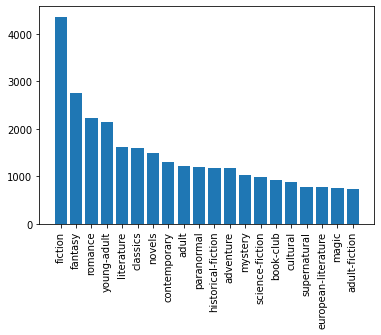

In [129]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
plt.bar(genrecount.index[:20],genrecount[:20])
plt.xticks(rotation=90)
plt.show()